# Прогнозирование конечных свойств новых материалов (композиционных материалов)
Композиционные материалы - это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента)

## Импорты

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Загрузить и объединить датасет

### Загрузка данных

In [2]:
X_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)

In [3]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


Есть 10 колонок тип данных float64. Строк 1024, пропусков нет.

In [4]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


Есть 3 колонки. 1 - int, 2 - float64. Строк 1040, пропусков нет.

### Объединение по индексу тип объединения INNER

In [5]:
full_df = X_bp.join(X_nup)

In [6]:
full_df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Поверхностная плотность, г/м2: **93.605670**

1)	Изучить теоретические основы и методы решения поставленной задачи.
2)	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
3)	Провести предобработку данных (удаление шумов, нормализация и т.д.).
4)	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
5)	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
6)	Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
7)	Оценить точность модели на тренировочном и тестовом датасете. 
8)	Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.


## Разведочный анализ

### Тепловая карта корреляций
Никаких сильных корреляций нет.

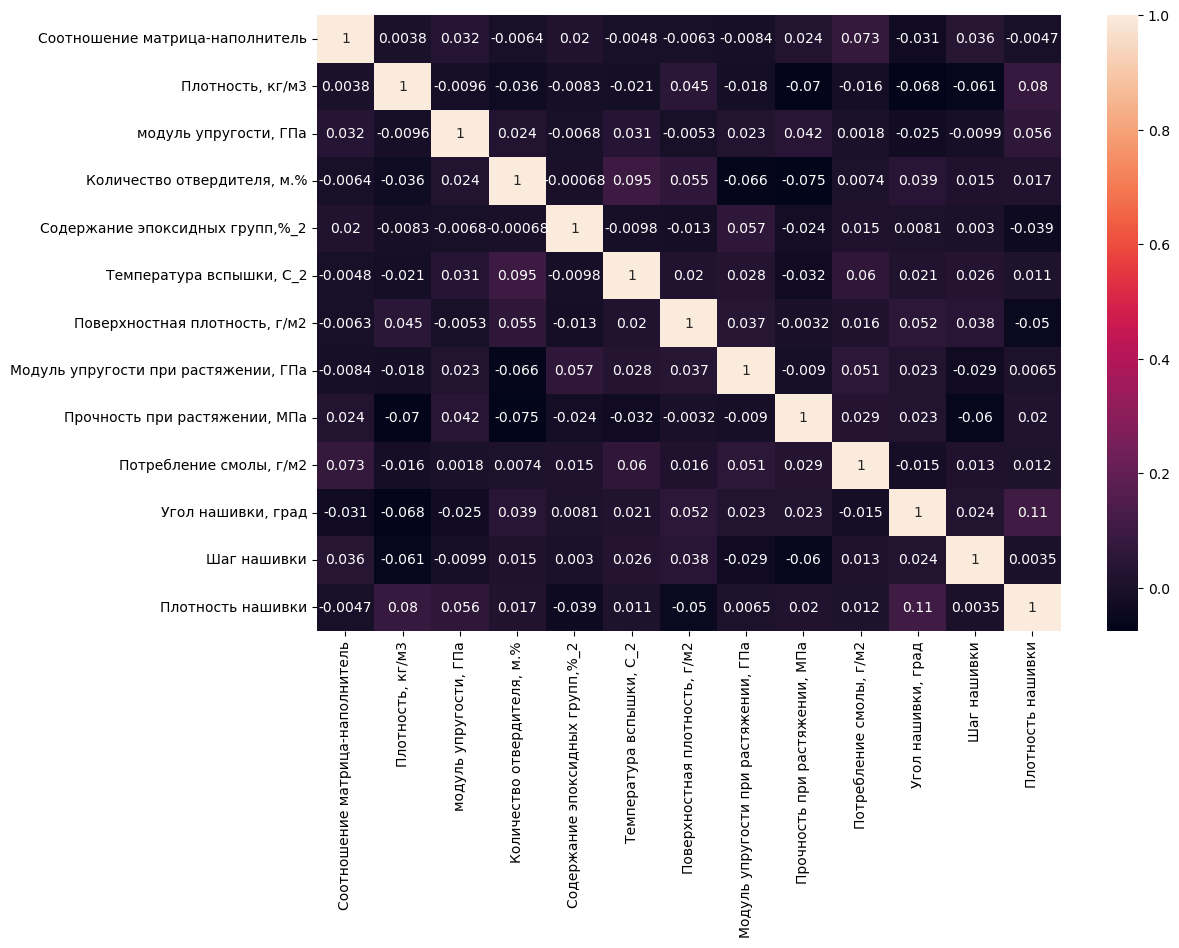

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(full_df.corr(), annot=True, )
plt.show()

### Гистограммы распределения каждой из переменной, диаграммы ящика с усами
график распределения признака 'Поверхностная плотность, г/м2' сдвинут влево, серьезных выбросов нет.

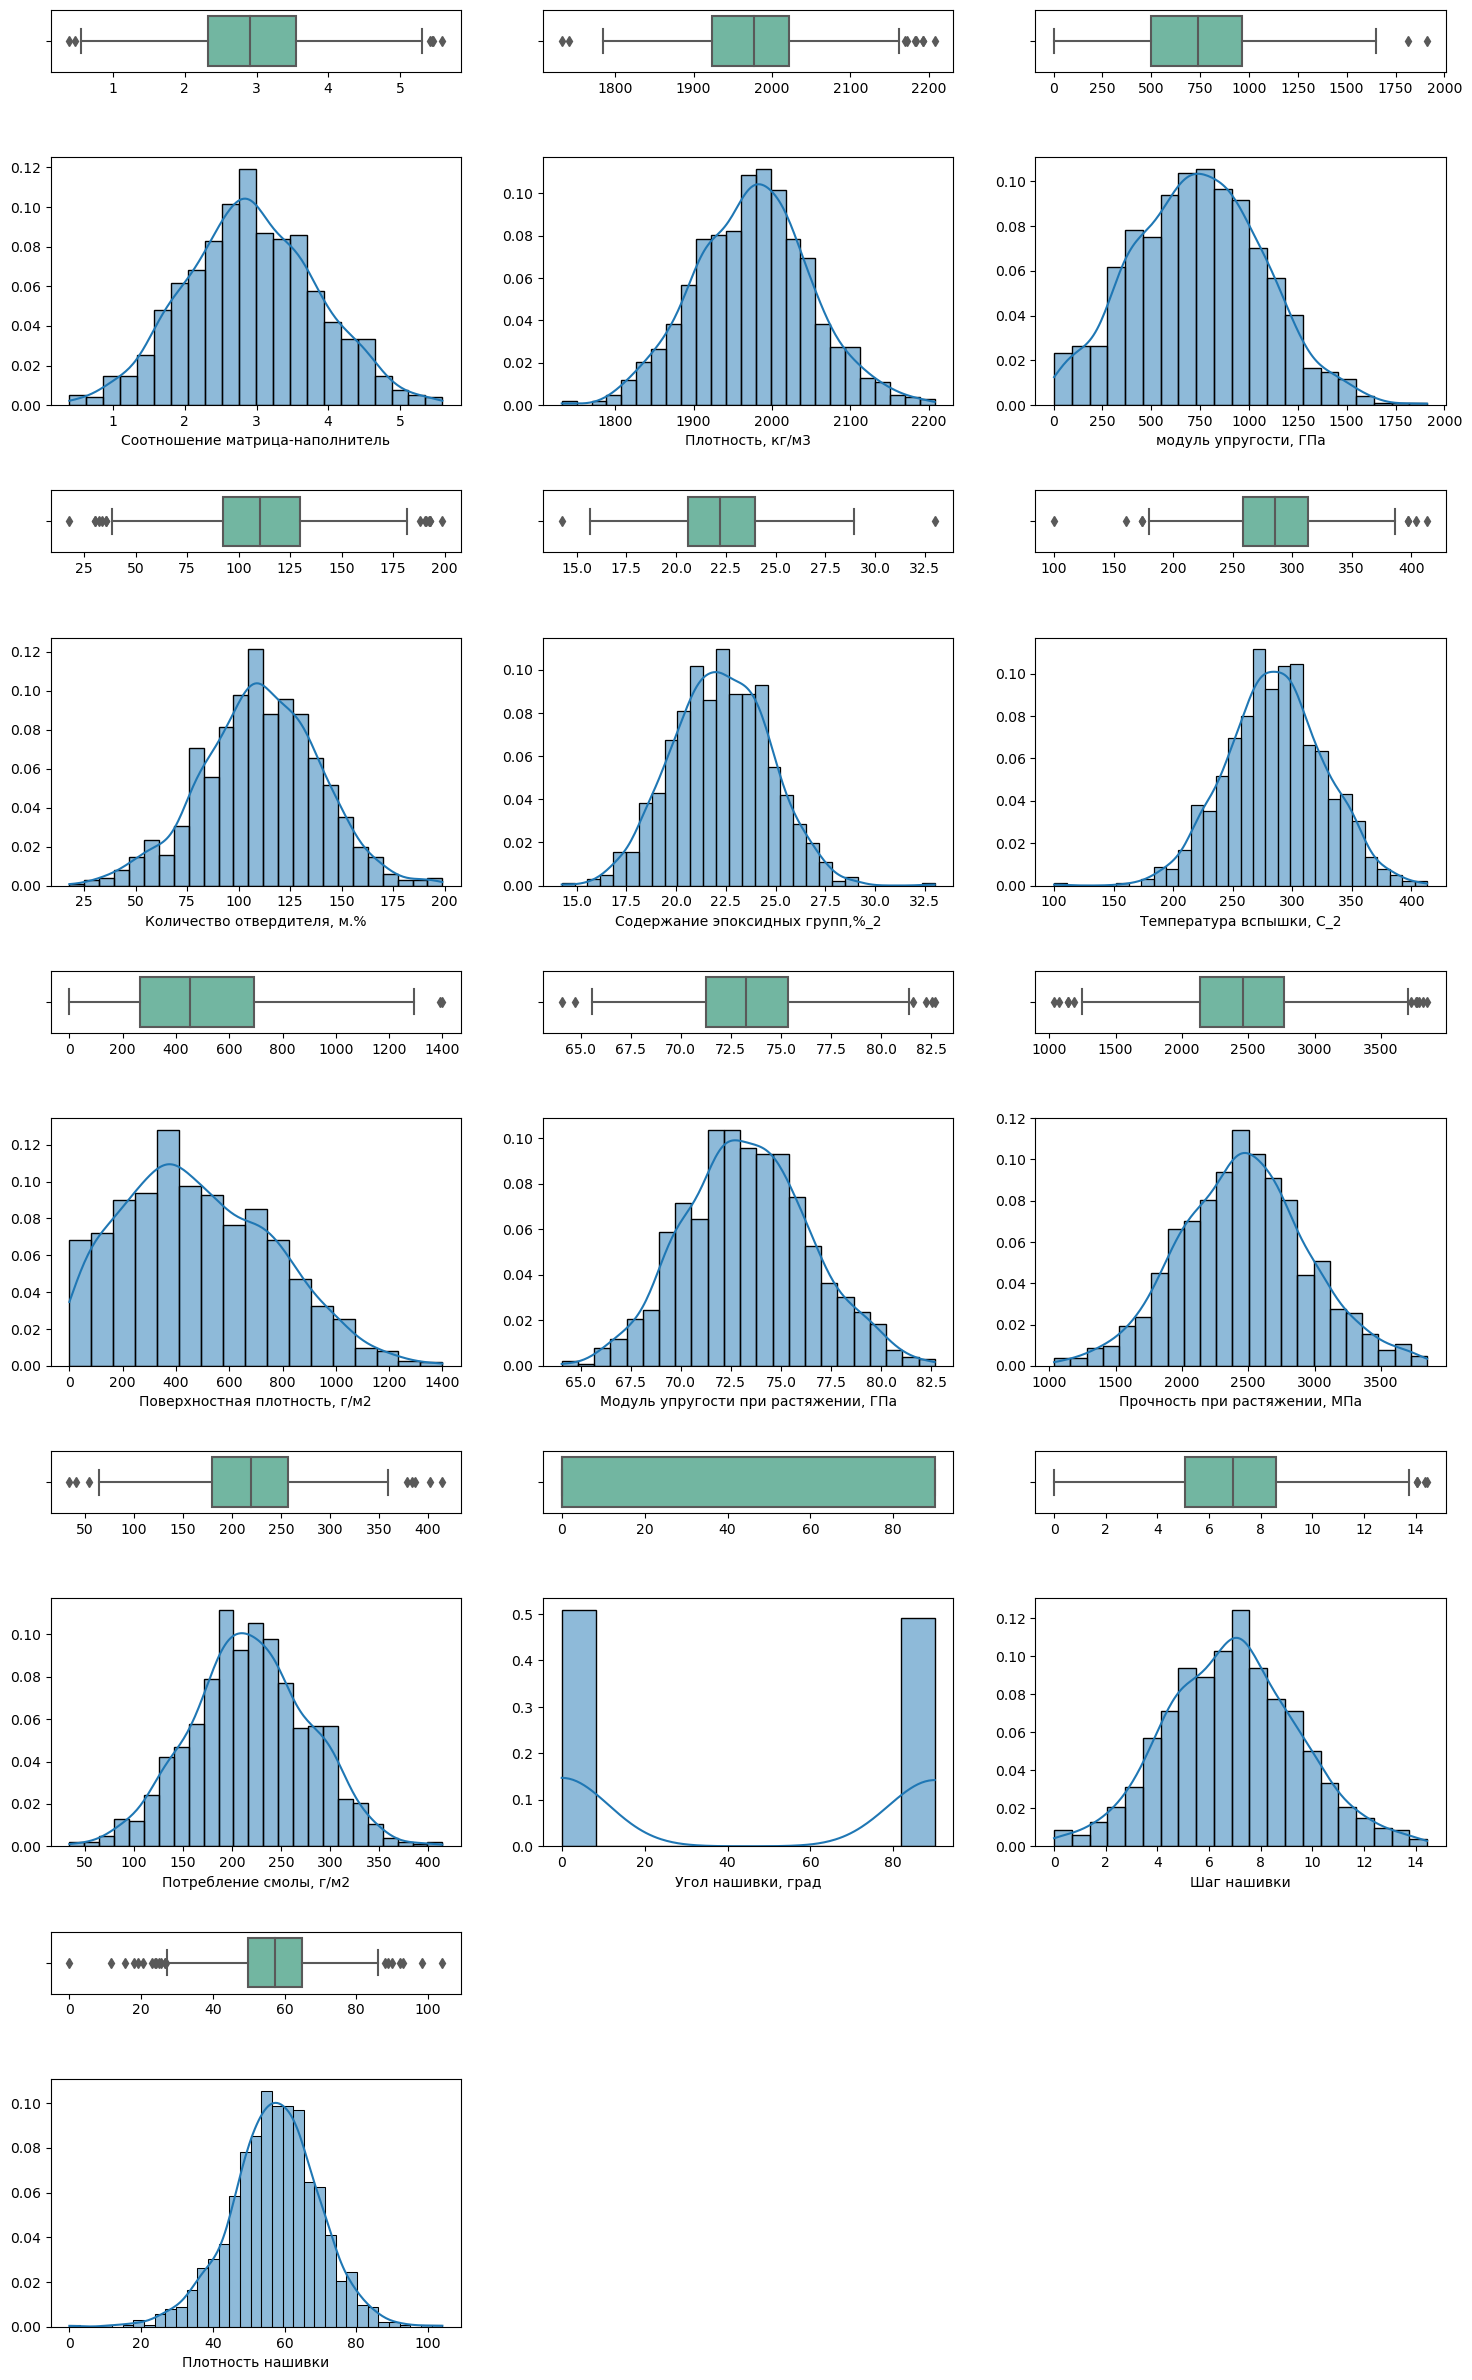

In [79]:
def visual(data, ncols=1):
    if len(data.shape) == 1:
        num_cols = 1
    else:
        num_cols = data.shape[1]
    if ncols > num_cols:
        ncols = num_cols
    spec = mpl.gridspec.GridSpec(ncols=ncols, nrows=num_cols * 2, height_ratios=[1, 4] * num_cols, hspace=0.55)
    fig = plt.figure(figsize=(18, (num_cols // ncols) * 20))
    i, j = -1, -1
    for l in range(num_cols):
        j += 1
        if not l % ncols:
            j = 0
            i += 1
        ax = fig.add_subplot(spec[2 * ncols * i + j])
        sns.boxplot(data=data, x=data.columns[ncols * i + j], palette='Set2', ax=ax).set(xlabel=None)
        ax = fig.add_subplot(spec[2 * ncols * i + j + ncols])
        sns.histplot(x=data.columns[ncols * i + j], kde=True, ax=ax, data=data, stat='probability').set(ylabel=None)
plt.show()

visual(full_df, 3)


### Попарные графики рассеяния точек
По-прежнему ничего похожего на линейные зависимости нет. Серьезных выбросов не видно.


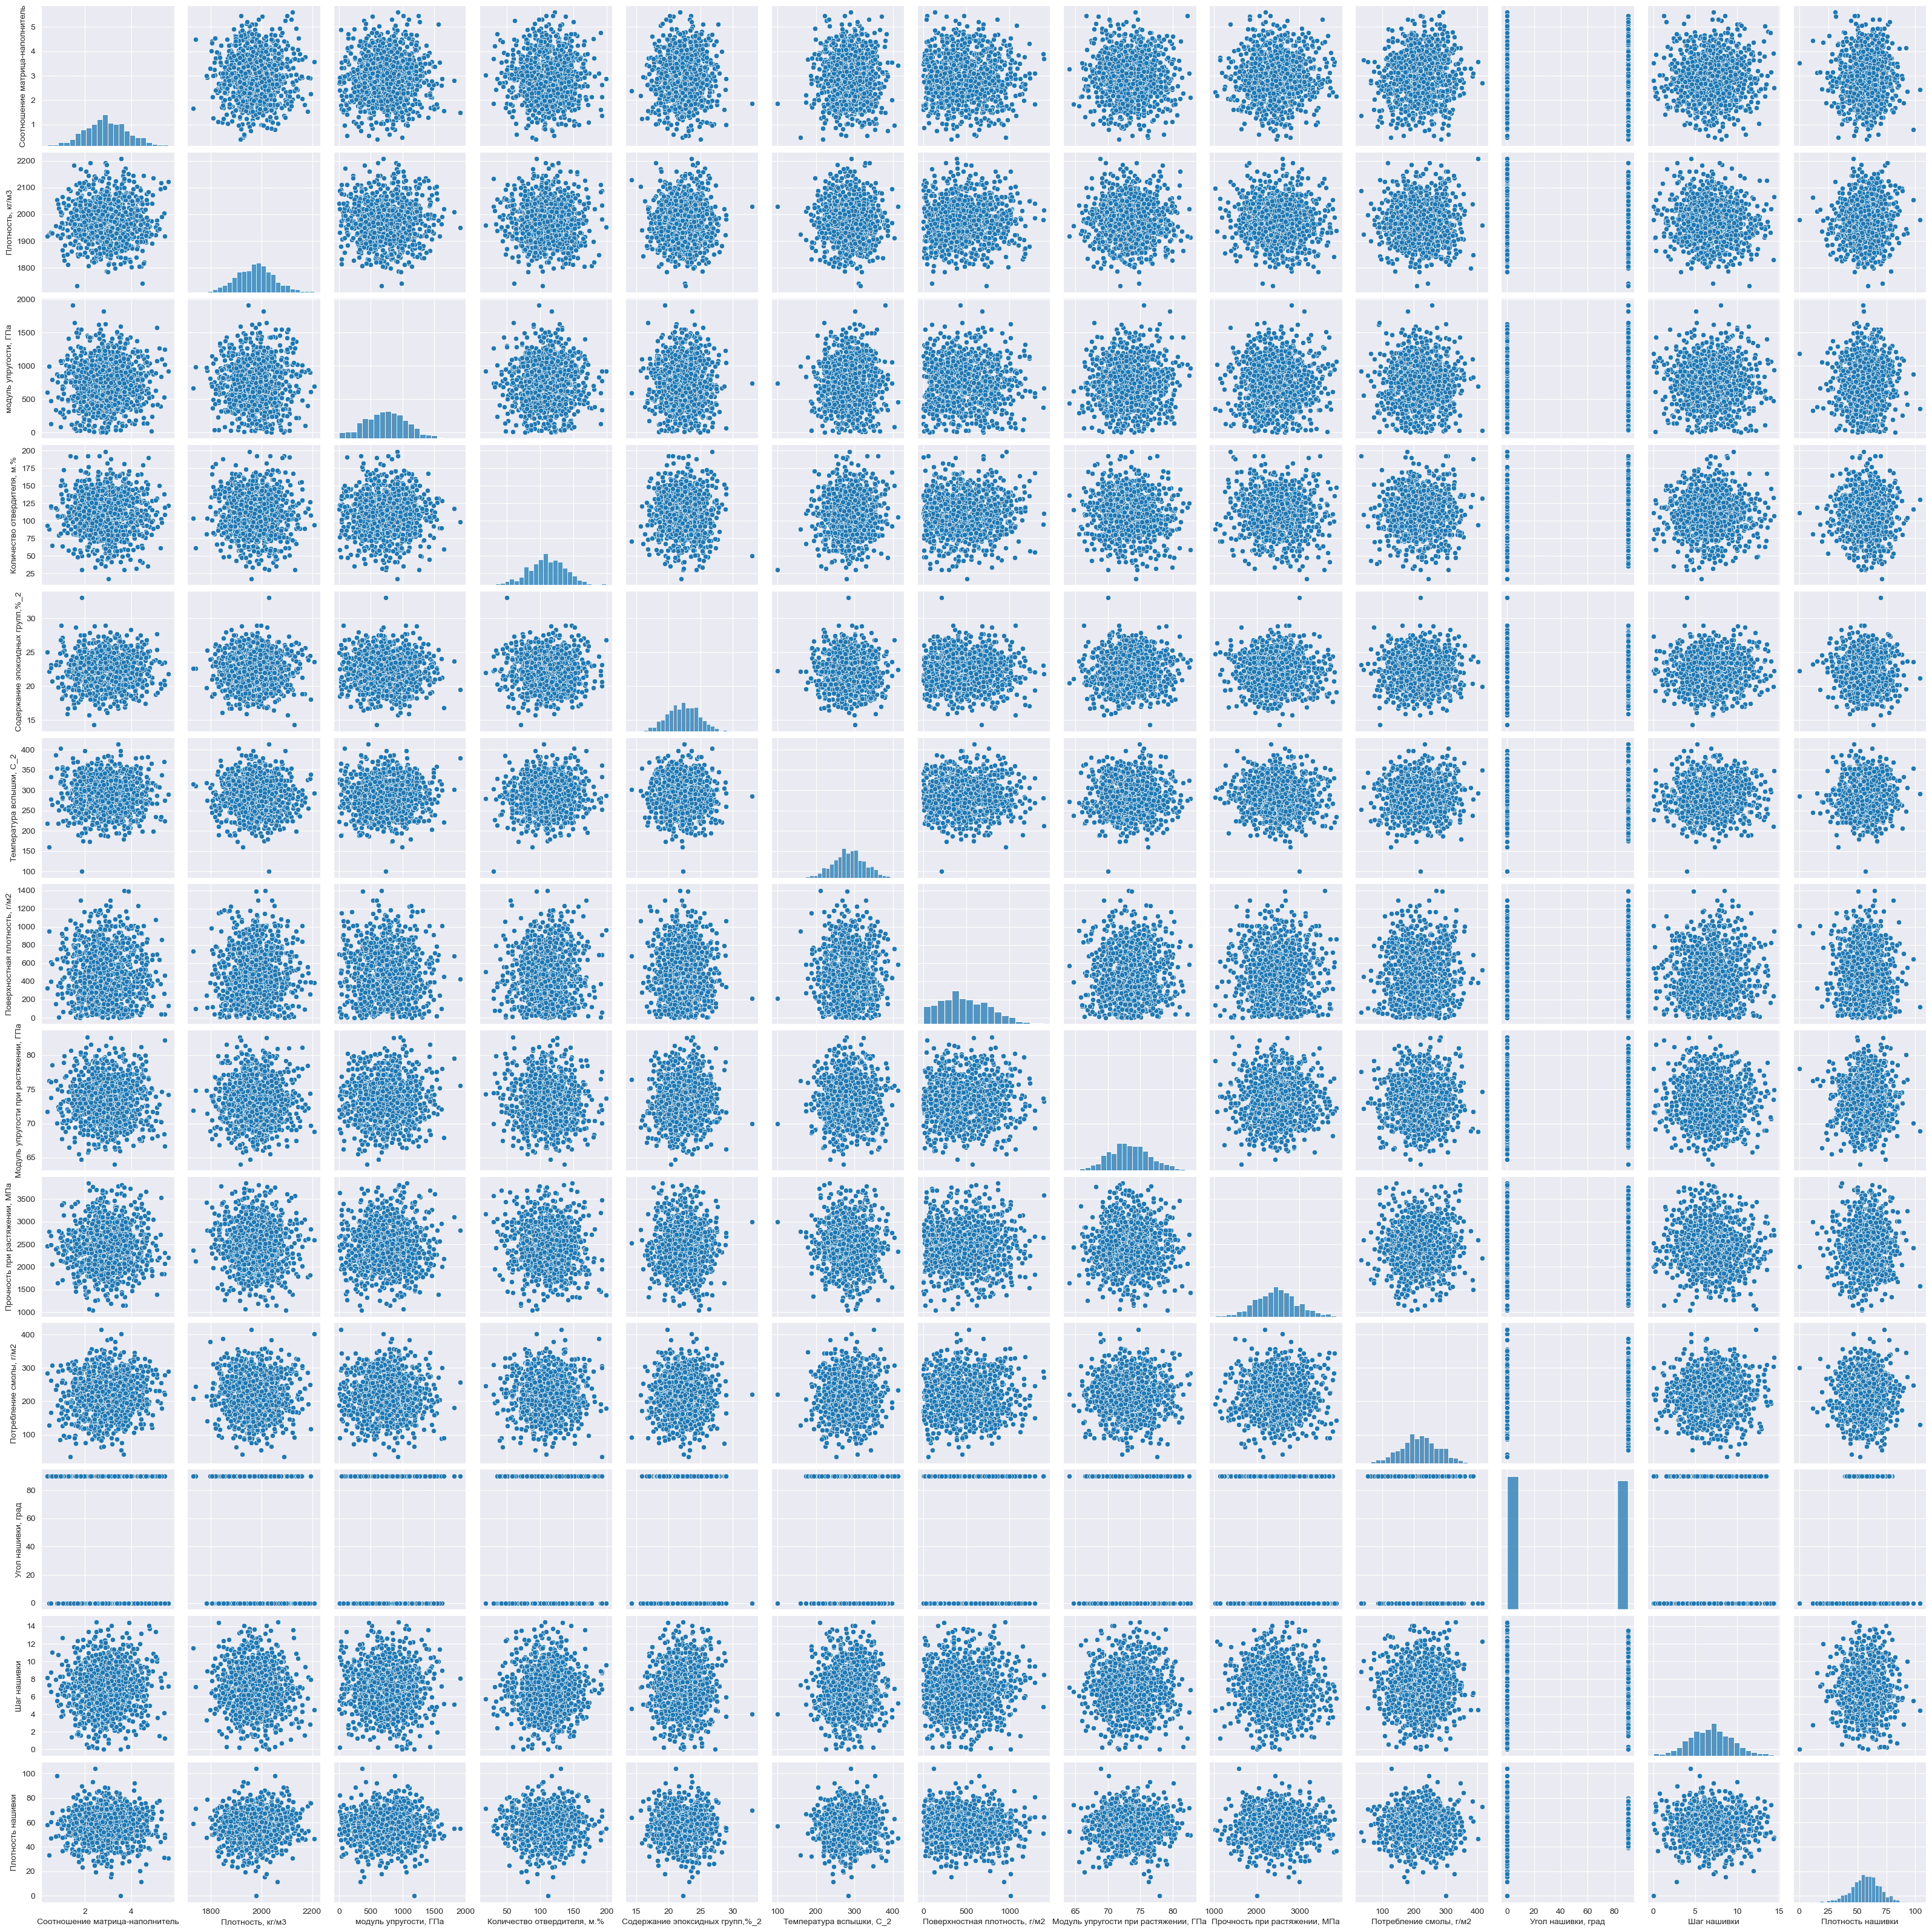

In [110]:
sns.pairplot(full_df)

### Среднее, медианное значение для каждой колонки

In [7]:
full_df.describe().loc[['mean', '50%']].T

mean          50%
Соотношение матрица-наполнитель          2.930366     2.906878
Плотность, кг/м3                      1975.734888  1977.621657
модуль упругости, ГПа                  739.923233   739.664328
Количество отвердителя, м.%            110.570769   110.564840
Содержание эпоксидных групп,%_2         22.244390    22.230744
Температура вспышки, С_2               285.882151   285.896812
Поверхностная плотность, г/м2          482.731833   451.864365
Модуль упругости при растяжении, ГПа    73.328571    73.268805
Прочность при растяжении, МПа         2466.922843  2459.524526
Потребление смолы, г/м2                218.423144   219.198882
Угол нашивки, град                      44.252199     0.000000
Шаг нашивки                              6.899222     6.916144
Плотность нашивки                       57.153929    57.341920

In [8]:
full_df.median() / full_df.mean() * 100

Соотношение матрица-наполнитель          99.198458
Плотность, кг/м3                        100.095497
модуль упругости, ГПа                    99.965009
Количество отвердителя, м.%              99.994638
Содержание эпоксидных групп,%_2          99.938655
Температура вспышки, С_2                100.005128
Поверхностная плотность, г/м2            93.605670
Модуль упругости при растяжении, ГПа     99.918495
Прочность при растяжении, МПа            99.700099
Потребление смолы, г/м2                 100.355154
Угол нашивки, град                        0.000000
Шаг нашивки                             100.245271
Плотность нашивки                       100.328919
dtype: float64

Поверхностная плотность, г/м2            93.605670

## Предобработка данных

In [26]:
X = full_df.copy()

In [27]:
X['Поверхностная плотность, г/м2'] = np.sqrt(X['Поверхностная плотность, г/м2'])

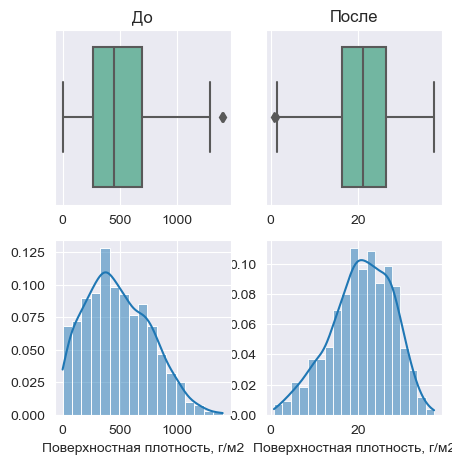

In [120]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=X, x=X['Поверхностная плотность, г/м2'],
            palette='Set2', ax=ax).set(xlabel=None, title='После')
ax = fig.add_subplot(2, 2, 4)
sns.histplot(x=X['Поверхностная плотность, г/м2'],
             kde=True, ax=ax, data=X, stat='probability').set(ylabel=None)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=full_df, x=full_df['Поверхностная плотность, г/м2'],
            palette='Set2', ax=ax).set(xlabel=None, title='До')
ax = fig.add_subplot(2, 2, 3)
sns.histplot(x=full_df['Поверхностная плотность, г/м2'],
             kde=True, ax=ax, data=full_df, stat='probability').set(ylabel=None)
plt.show()

## Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

In [28]:
y1 = X.pop('Модуль упругости при растяжении, ГПа')
y2 = X.pop('Прочность при растяжении, МПа')

In [73]:
#y = pd.concat([y1, y2], axis=1)
#y = y1
y = y2

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_mse = mean_squared_error(y_test, y_pred, squared=False)
training_data_mse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Тестовая выборка MSE = {round(test_data_mse,4)}")
print(f"Тренировочная выборка MSE = {training_data_mse:.4f}")
mean_absolute_error(y_train, y_train_pred)

Тестовая выборка MSE = 504.5078
Тренировочная выборка MSE = 472.0177


371.9960288673411

Тестовая выборка MSE = 253.8734
Тренировочная выборка MSE = 237.5323

Контролирующая выборка RMSE = 3.2390
Обучающая выборка RMSE	3.0468

Тестовая выборка RMSE = 504.6355
Тренировочная выборка RMSE	472.0160

In [84]:
svr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=500.0, epsilon=0.1))
svr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=500.0, kernel='poly'))])

In [85]:
y_pread = svr.predict(X_test)

In [86]:
mean_squared_error(y_test, y_pred, squared=False)

504.5078028892687

In [87]:
print('Support Vector Regression Results')
print('MAE:', round(mean_absolute_error(y_test, y_pred), 4))
print('MAPE: ',round(np.mean(np.abs((y_test - y_pred)/y_test))*100, 2), '%', sep='')

Support Vector Regression Results
MAE: 402.6191
MAPE: 17.78%


In [88]:
logr = LogisticRegression(random_state=32)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print('LogisticRegression')
print('MAE:', round(mean_absolute_error(y_test, y_pred), 4))
print('MAPE: ',round(np.mean(np.abs((y_test - y_pred)/y_test))*100, 2), '%', sep='')

ValueError: Unknown label type: 'continuous'

In [66]:
svr.predict(X_test[1:2])

array([2663.81352828])

In [67]:
y_test[1:2]

745    2282.412785
Name: Прочность при растяжении, МПа, dtype: float64